<img alt="Logo ITA" width="500" src="https://logodownload.org/wp-content/uploads/2018/01/ita-logo.png">

*Autor do material:* **Thiago Gonçalves Guimarães Lopes**

*Desenvovlido para a Disciplina:* **CT-600 Estágio Docência**

#### **Aula 5 - Support Vector Machine**

---

# Fundamento do SVM

---
O Support Machine Vector (SVM), Máquina de Vetores de Suporte em português,
é uma técnica de aprendizado de máquina baseado no aprendizado estático [1]. Os SVM lineares utilizam a hipótese dos dados apresentarem um comportamento
linear. O modelo é então elucidado supondo que tais dados sejam separados linearmente e
podem ser separados por uma função h descrita por [1,2,4]:
$$
h(\mathbf{x}) = \mathbf{w}.\mathbf{x}+b 
$$
sendo $\mathbf{w}.\mathbf{x}$ é o produto escalar entre os vetores $\mathbf{w}$ e $\mathbf{x}$ e $\mathbf{w}$ é o vetor normal ao hiperplano do conjunto e $\frac{b}{|| \mathbf{w}||}$ é a distância do plano a origem.

Desta forma, é possível então escrever uma função capaz de separar dois conjuntos de dados, isto é:
$$
g(\mathbf{x}) = sgn(h(\mathbf{x})) = 
  \begin{cases}
    +1       & \quad \text{se } \mathbf{w}.\mathbf{x}+b > 0\\
    -1      & \quad \text{se } \mathbf{w}.\mathbf{x}+b < 0\\
  \end{cases}
  $$

A partir de h(x) é possível obter infinitos hiperplanos
que possa dividir a amostra. É necessário então definir um plano canônico, isto é, $h(\mathbf{x})=0$ que satisfça essas relações, chegando então no conjunto teório que melhor soluciona o sistema[1,2,3,4,5]:
$$
\begin{cases}
    \mathbf{w}.\mathbf{x}+b \geq +1     & \quad \text{se } y_i=+1\\
    \mathbf{w}.\mathbf{x}+b \leq -1     & \quad \text{se }  y_i=-1\\
  \end{cases}  $$ 
  
$$
y_i(\mathbf{w}.\mathbf{x}+b)-1 \geq 0\ , \ \forall \ (\mathbf{x}_i,y_i) \in \mathbf{X}\\
$$
nos casos de classificação.
![img](https://miro.medium.com/max/724/1*Rpw8EXp3kI_dObeSlZ4RWw.png)

E nos casos de regressão:
$$
\left\{\begin{matrix}
y_i - \mathbf{w \cdot x_i} - b \leq \epsilon_i + \xi \\ 
\mathbf{w \cdot x_i} + b - y_i \leq \epsilon_i + \overline{\xi}
\\
\xi_i,\overline{\xi}_i \geq 0
\end{matrix}\right.
$$
sendo no qual $\xi$ e $\overline{\xi}$ representam as variáveis de folga e $C$ uma variável que equilibra a regularização de $h$.
![img](https://kernelsvm.tripod.com/index_files/image006.jpg)

Porém em situações reais, é praticamente impossível que todos os dados ou conjuntos de dados relacionados que sejam totalmente separáveis linearmente. Isto ocorre devido a presença de ruídos, outliers ou a própria natureza do problema [4].

![img](https://software.intel.com/content/dam/develop/external/us/en/images/iot-improving-performance-of-support-vector-machine-figure-4-684886.png)

Para contornar esse problema, utiliza-se Kernels para maepar o conjunto de entrada. O procedimento para lidar com problemas não lineares mapeando o conjunto de treinamento no seu espaço original para um espaço de maior dimensão [1,2,4]. Supondo um conjunto não linear de espaço de entrada $X$, existe uma função $\Phi$ que permite mapear o espaço de entrada em um novo espaço $\mathfrak{I}$, sendo que a escolha adequada da função $\Phi$ permite com que o conjunto de treinamento venha no novo espaço possa ser separado linearmente.

$$
h(\mathbf{x}) = \mathbf{w}.\Phi(\mathbf{x})+b 
$$

onde a função $\Phi$ mapeia o espaço $X$ encontrando um hiperplano no novo espaço $\mathfrak{I}$ com maior margem de separação, garantindo assim uma boa generalização do problema.

Pela definição, um kernel $K$ é uma função que recebe os pontos $\mathbf{x}_i$ e $\mathbf{x}_j$ no espaço de entrada e calculada o produto escalar destes dois objetos, isto é:
\begin{equation}
K(\mathbf{x}_i,\mathbf{x}_j)=\Phi(\mathbf{x}_i).\Phi(\mathbf{x}_j)
\end{equation}

Os Kernels mais utilizados na prática: Polinomiais, RBF ($\textit{radial basis function}$) e Sigmoidal. 
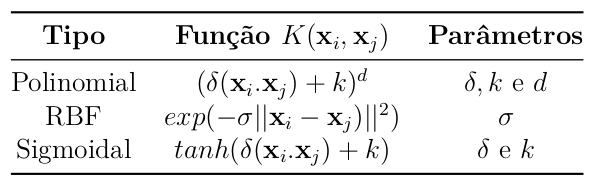


**Referência:**
* [1] GÉRON, A. **Mãos à Obra Aprendizado de Máquina com Scikit-Learn e TensorFlow: Conceitos, ferramentas e técnicas para construção de sistemas inteligentes**. [S.l.]: Alta Books, 2019. Traduzido por Rafael Contatori. ISBN 9788550803814.
* [2] SCIKIT-LEARN. **Support Vector Machines**. 2020. Disponível
em: <https://scikit-learn.org/stable/modules/svm.html>
* [3] BIGOTO, M. A. R. **Implementação de modelos de machine learning para predição de temperaturas críticas de supercondutores**. 2020. Disponível em: <https://github.com/muriloafonso/TG_ENG_FISICA>.
* [4] FACELI, K. et al. **Inteligência artificial: Uma abordagem de aprendizado de máquina**. 2011.
* [5] LOPES, T. G. G. **Análise comparativa de modelos de Machine Learning na predição de Câncer de pele**. 2020. Disponível em: <https://github.com/thiagolopes97/TCC-ThiagoLopes/blob/main/TCC_ThiagoLopes_Final.pdf>.

# Support Vector Machine - Sample Generator

In [1]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs,make_circles # Criação das amostras

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Ref: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

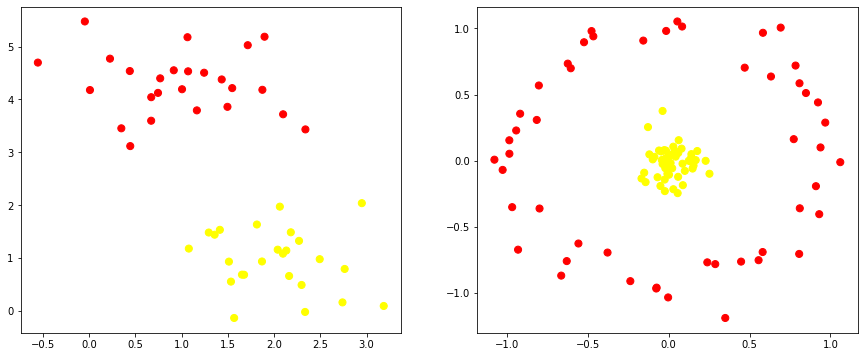

In [3]:
# Preparação das configurações de gráfico

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)

# Criação da amostra simples - Separação Linear

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

plt.subplot(1,2,2)

# Criação da amostra simples - Separação Radial

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.show()

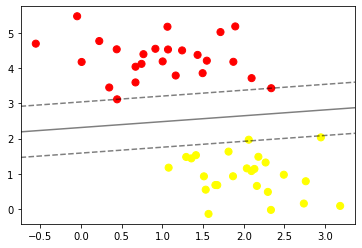

In [4]:
# Criação da amostra simples - Separação Linear

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# Treinamento do modelo SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Visualização dos dados com os perfis de sepração do modelo
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

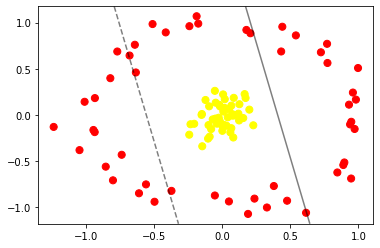

In [5]:
# Criação da amostra simples - Separação Radial

X, y = make_circles(100, factor=.1, noise=.1)

# Treinamento do modelo SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Visualização dos dados com os perfis de sepração do modelo
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

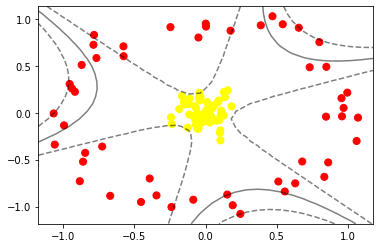

In [6]:
# Criação da amostra simples - Separação Radial

X, y = make_circles(100, factor=.1, noise=.1)

# Treinamento do modelo SVM
clf = SVC(kernel='poly')
clf.fit(X, y)

# Visualização dos dados com os perfis de sepração do modelo
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

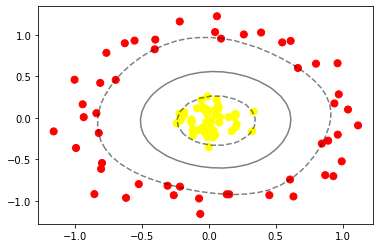

In [7]:
# Criação da amostra simples - Separação Radial

X, y = make_circles(100, factor=.1, noise=.1)

# Treinamento do modelo SVM
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Visualização dos dados com os perfis de sepração do modelo
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# Support Vector Classifier - Iris Dataset

In [8]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline

In [9]:
'''Sobre o dataset: Vamos classificar qual é o tipo da planta baseado nas dimensões de comprimento e 
largura das pétalas e sépalas. Porém, agora estamos utilizando o dataset do próprio Sklearn, então
a forma como os dados estão dispostos é um pouco diferente do outro método que utilizamos .'''


# load do dataset
# Olhe o resultado desta linha de comando, observe os atributos desse dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"] = iris.target
df["target_name"] = df["target"].map({ 0: 'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


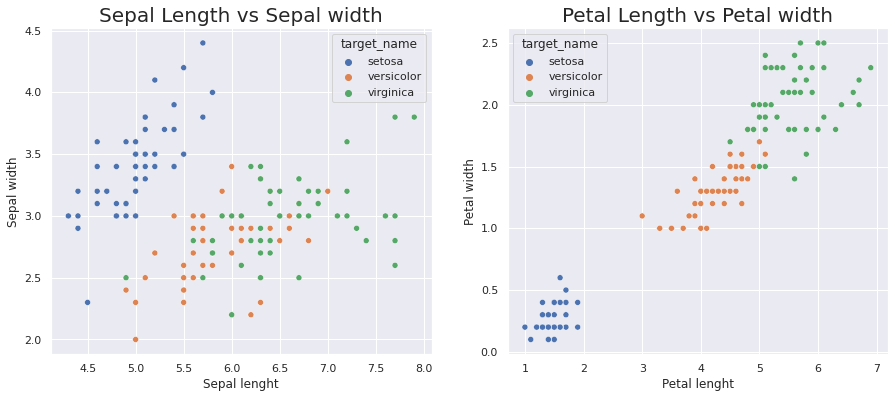

In [10]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)",
                hue="target_name", data=df)
plt.title('Sepal Length vs Sepal width', fontsize = 20)
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')


plt.subplot(1, 2, 2)
sns.scatterplot(x="petal length (cm)", y="petal width (cm)",
                hue='target_name', data=df)
plt.title('Petal Length vs Petal width', fontsize = 20)
plt.xlabel('Petal lenght')
plt.ylabel('Petal width')

plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9811320754716981


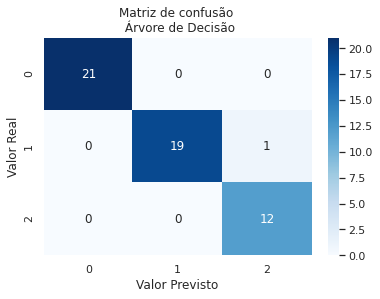

In [11]:
# Separação do conjunto de input e output

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df[['target']]

# Split Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Treinamento do modelo
clf = svm.SVC()
clf.fit(X_train,y_train)

# Testando o modelo
y_pred = clf.predict(X_test)

# Cálculo da accurárcia do modelo - Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Cálculo da  matriz de confusão - Confusion Matrix

cnf = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(cnf,annot=True, cmap="Blues" ,fmt='g')

plt.title("Matriz de confusão \n Árvore de Decisão")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.show()

In [12]:
#svm.SVC(kener = "linear")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9245283018867925


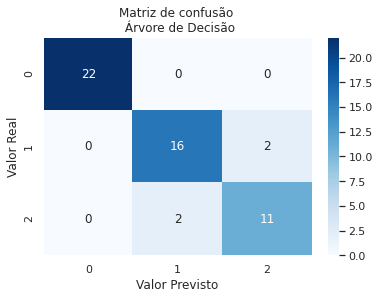

In [13]:
# Separação do conjunto de input e output

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
y = df[['target']]

# Split Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# Treinamento do modelo
clf = svm.SVC(kernel="poly")
clf.fit(X_train,y_train)

# Testando o modelo
y_pred = clf.predict(X_test)

# Cálculo da accurárcia do modelo - Accuracy 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Cálculo da  matriz de confusão - Confusion Matrix

cnf = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(cnf,annot=True, cmap="Blues" ,fmt='g')

plt.title("Matriz de confusão \n Árvore de Decisão")
plt.ylabel("Valor Real")
plt.xlabel("Valor Previsto")

plt.show()

# SVM Regressor - House Pricing

In [14]:
# Importação das bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


# Normalmente as estruturas a serem analisadas estão em formato CSV, EXCEL - Estes casos são mais fáceis de
# lidar e será mostrado seus procedimentos posteriormente.
dataset = load_boston()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df["target"] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


MSE: 6.131887150194428
RMSE: 82.62146770854568
R²: 0.10650788276085243


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


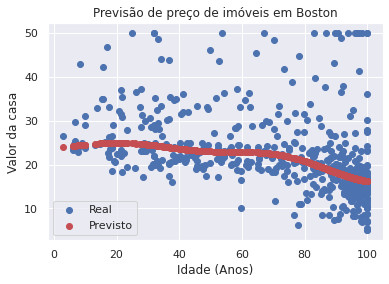

In [15]:
# Separar os valores de atributo e alvo

X = df[['AGE']] # Exemplificando uma regressão linear simples
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Chamar a função do Modelo

SVMReg = svm.SVR()
SVMReg.fit(X_train,y_train)

# Predizer os valores de teste

y_pred = SVMReg.predict(X_test)
y_pred_total = SVMReg.predict(X)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


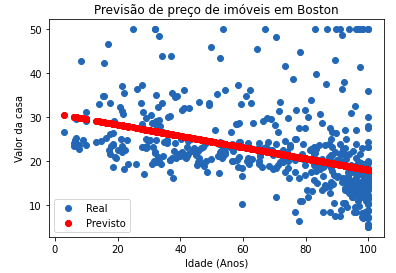

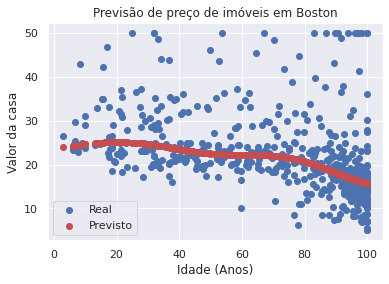

MSE: 6.11234065172131
RMSE: 89.82745862617267
R²: 0.0996749589371898


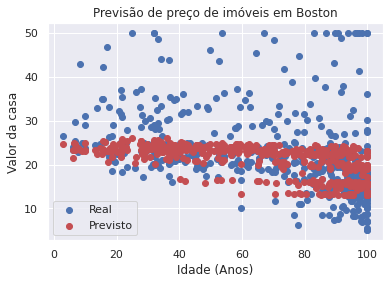

In [16]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Chamar a função do Modelo

SVMReg = svm.SVR(kernel="rbf")
SVMReg.fit(X_train,y_train)

# Predizer os valores de teste

y_pred = SVMReg.predict(X_test)
y_pred_total = SVMReg.predict(X)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


MSE: 4.244556636398497
RMSE: 37.1978326286596
R²: 0.3422557522441261


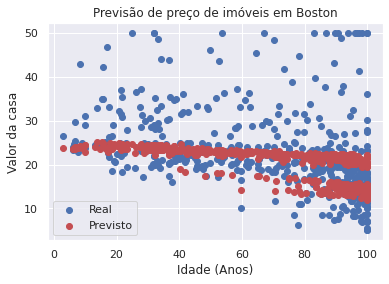

In [17]:
# Separar os valores de atributo e alvo

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['target']

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Separar o conjunto em Treino/ Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Chamar a função do Modelo

SVMReg = svm.SVR(kernel="poly")
SVMReg.fit(X_train,y_train)

# Predizer os valores de teste

y_pred = SVMReg.predict(X_test)
y_pred_total = SVMReg.predict(X)

# Calcular as métricas do modelo

print("MSE: {}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("RMSE: {}".format(metrics.mean_squared_error(y_test,y_pred)))
print("R²: {}".format(metrics.r2_score(y_test,y_pred)))

plt.scatter('AGE','target',data=df,label='Real')
plt.scatter(df['AGE'],y_pred_total,label='Previsto',color='R')
plt.xlabel('Idade (Anos)')
plt.ylabel('Valor da casa')
plt.title('Previsão de preço de imóveis em Boston')
plt.legend()

plt.show()


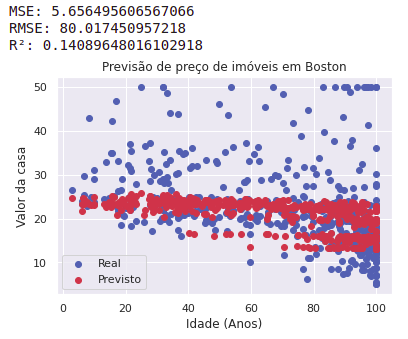

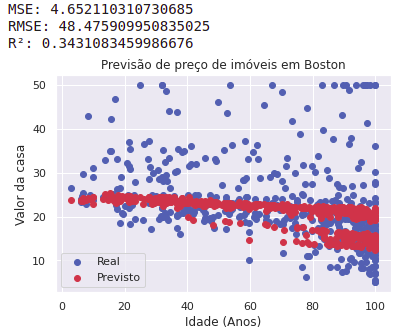